# 3.2: Multiple predictors

In [1]:
from __future__ import print_function, division
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# use matplotlib style sheet
plt.style.use('ggplot')

# import statsmodels for R-style regression
import statsmodels.formula.api as smf

## Read the data

Data are in the *child.iq* directory of the ARM_Data download-- you might have
to change the path I use below to reflect the path on your computer.

In [2]:
#R: library("foreign")
#   kidiq <- read.dta("../../ARM_Data/child.iq/kidiq.dta")
kidiq  = pd.read_stata("../../ARM_Data/child.iq/kidiq.dta")
kidiq.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


## Regression -- multiple predictors, Pg 33

In [3]:
#R: 
# fit <- lm(kidiq$kid_score ~ kidiq$mom_hs + kidiq$mom_iq)
# display(fit)
fit= smf.ols('kid_score ~ mom_hs + mom_iq', data=kidiq).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     58.72
Date:                Fri, 24 Jul 2015   Prob (F-statistic):           2.79e-23
Time:                        15:00:58   Log-Likelihood:                -1872.0
No. Observations:                 434   AIC:                             3750.
Df Residuals:                     431   BIC:                             3762.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     25.7315      5.875      4.380      0.0

## Figure 3.3, Pg 33

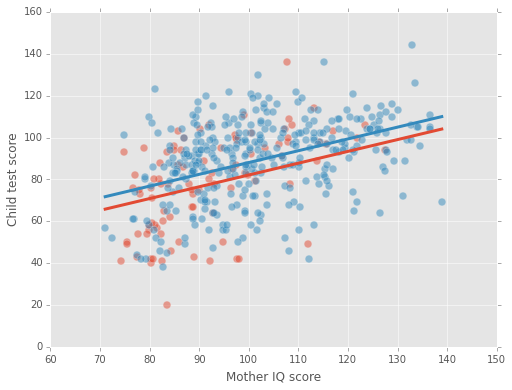

In [4]:
#R: 
# plot(kidiq$mom_iq, kidiq$kid_score,
#      xlab="Mother IQ score", 
#      ylab="Child test score",
#      pch=20, xaxt="n", yaxt="n", type="n")
# curve(coef(fit2)[1] + coef(fit2)[2] + coef(fit2)[3]*x, add=TRUE, col="gray")
# curve(coef(fit2)[1] + coef(fit2)[3]*x, add=TRUE)
# points(kidiq$mom_iq[kidiq$mom_hs==0],
#        kidiq$kid_score[kidiq$mom_hs==0], pch=19)
# points(kidiq$mom_iq[kidiq$mom_hs==1], 
#        kidiq$kid_score[kidiq$mom_hs==1], col="gray", pch=19)
# axis(1, c(80,100,120,140))
# axis(2, c(20,60,100,140))

fig, ax = plt.subplots(figsize=(8, 6))
iq_linspace = np.linspace(kidiq['mom_iq'].min(), kidiq['mom_iq'].max(), 50)

# default color cycle
colors = plt.rcParams['axes.color_cycle']
# mom_hs == 0
hs0 = (kidiq['mom_hs'] == 0)
plt.scatter(kidiq[hs0]['mom_iq'], kidiq[hs0]['kid_score'],
            s=60, alpha=0.5, c=colors[0])
# mom_hs == 1
hs1 = (kidiq['mom_hs'] == 1)
plt.scatter(kidiq[hs1]['mom_iq'], kidiq[hs1]['kid_score'],
            s=60, alpha=0.5, c=colors[1])
# add fits
# mom_hs == 0
plt.plot(iq_linspace, fit.params[0] + fit.params[1] * 0. + fit.params[2] * iq_linspace,
         lw=3, c=colors[0])
# mom_hs == 1
plt.plot(iq_linspace, fit.params[0] + fit.params[1] * 1. + fit.params[2] * iq_linspace,
         lw=3, c=colors[1])

plt.xlabel("Mother IQ score")
plt.ylabel("Child test score")